# every10 Stats

In this notebook we analyze some statistics from the every10 muram2hanlert computation

In [1]:
import os
import os.path
import sys

In [2]:
sys.path.extend([os.path.expanduser("~/muram/python_codes"),
                 os.path.expanduser("~/hanlert/python"),
                 os.path.expanduser("~")])

In [3]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import shutil

import muram
import hanlert
import muram2hanlert

In [4]:
%matplotlib inline

In [5]:
%load_ext autoreload

In [6]:
%autoreload 2

In [7]:
os.getpid() # for checking memory/CPU in terminal

272630

## Analyze every10 Jobs

In [8]:
jobroot = os.path.expanduser("~/work/muram2hanlert")
jobname = 'every10'
iteration = 12000

In [9]:
muram2hanlert.job_status(jobroot, jobname, iteration, 0, 0)

('OK', 597)

In [10]:
run_status = muram2hanlert.run_status(jobroot, jobname)

In [11]:
N = len(run_status[iteration])
print("N:", N)

N: 23409


In [12]:
t_OK = []
p_OK = []
for (y, z), (status, t) in run_status[iteration].items():
    if status == "OK":
        t_OK.append(t)
        p_OK.append((y, z))
    else:
        print("Job at", (y, z), "has status", status, "in", t)
t_OK = np.array(t_OK)
p_OK = np.array(p_OK)
ix_sort = np.argsort(t_OK)
t_OK = t_OK[ix_sort]
p_OK = p_OK[ix_sort]
N_OK = t_OK.size
print(f"{N_OK} of {N} ({N_OK/N*100:0.2f}%) jobs finished OK")

Job at (140, 960) has status STARTED in 15812.130417823792
Job at (140, 970) has status STARTED in 15812.109112501144
Job at (150, 960) has status STARTED in 14123.796450853348
Job at (210, 400) has status STARTED in 5902.329728603363
Job at (240, 0) has status STARTED in 5914.612651348114
Job at (240, 580) has status STARTED in 13086.292612075806
Job at (260, 590) has status STARTED in 11303.348128557205
Job at (350, 660) has status STARTED in 10585.58318734169
Job at (380, 10) has status STARTED in 12495.097200155258
Job at (540, 140) has status STARTED in 5315.858439445496
Job at (540, 1080) has status STARTED in 12494.932387590408
Job at (560, 1110) has status STARTED in 69264.58112812042
Job at (570, 1090) has status STARTED in 12082.841134786606
Job at (570, 1100) has status STARTED in 12415.151743412018
Job at (580, 1090) has status STARTED in 12340.355800628662
Job at (580, 1100) has status STARTED in 69719.95054388046
Job at (590, 1090) has status STARTED in 12423.698621749878

median time: 8.700 minutes
total time: 4268.377 hours
Core-hours: 1.537e+05 core-hours


Text(0.5, 1.0, 'Time of Completed Jobs')

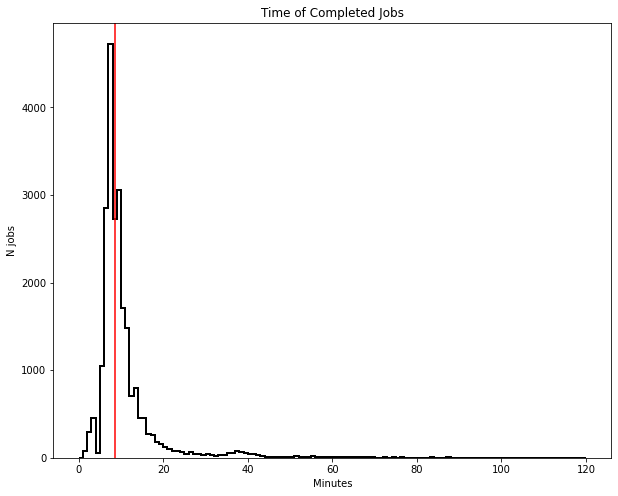

In [13]:
t_OK_med = np.median(t_OK / 60) # minutes
t_OK_sum = np.sum(t_OK / 3600) # hours
t_OK_ch = t_OK_sum * 36 # core-hours; used 36 cores per job

print(f"median time: {t_OK_med:0.3f} minutes")
print(f"total time: {t_OK_sum:0.3f} hours")
print(f"Core-hours: {t_OK_ch:0.3e} core-hours")

fig, ax = plt.subplots(figsize=(10, 8))
ax.hist(t_OK / 60., bins=np.arange(0, 121, 1), histtype='step', color='k', lw=2)
ax.axvline(t_OK_med, c='r')
ax.set_xlabel("Minutes")
ax.set_ylabel("N jobs")
ax.set_title("Time of Completed Jobs")